In [1]:
%matplotlib inline

# Maximum Likelihood Estimation

This method is used by researcher to help finding the solution to determine the best estimator for parameter of their desired distribution. The idea behind this MLE technique is to find parameters for which the observed data have the highest joint probability. Let's say that we have $ x_1, x_2, ..., x_n $ observed data that is assumed coming from an exponential distribution, this means that for each $x_i$ we have $ f(x) = \frac{1}{\lambda} e^{- \frac{x}{\lambda}} $ probability to get each  $x_i$. Now, if I would like to ask myself what is the probability of me seeing this  $ x_1, x_2, ..., x_n $ data, the probability would be $ Prob(x_1, x_2, ..., x_n) $. If I assumed the data to be independent of each other, we can write the probability to be 
$$ Prob(x_1, x_2, ..., x_n) = Prob(x_1) \times Prob(x_2) \times ... \times Prob(x_n) = \prod_{i=1}^{n} Prob(x_i) \ $$.

The probability of seeing $ Prob(x_1, x_2, ..., x_n) $ is often called as the joint probability. And this MLE technique is used to maximise the joint probability (or likelihood). One way to find the maximum likelihood is by using calculus derivative. Often time the likelihood function, $\  L(\theta ) $ is hard to deal with. Thus usually we'll use log-likehood, $\ l(\theta) $ function to proceed with this MLE technique. Why? because if we take the derivation of $\ l(\theta) $, we'll probably just need to deal with summation of a function (which is helpful to ease the computation). The simulation below will show how this technique works and how one can create their own function and find their own MLE if the function that they deal with is not covered in any of the python package exists. We'll use exponential distribution for this simulation.

Let's say we are observing 50 data that is coming from an exponential distribution with $\lambda = 3$. In real world, we will not have the information about $\lambda$. So we'll use MLE to see if we get the same parameter with the expo($\lambda = 3$) that we generated.

(array([15., 11., 11.,  5.,  3.,  1.,  3.,  0.,  0.,  1.]),
 array([ 0.02527103,  1.55827286,  3.09127468,  4.6242765 ,  6.15727832,
         7.69028015,  9.22328197, 10.75628379, 12.28928561, 13.82228744,
        15.35528926]),
 <BarContainer object of 10 artists>)

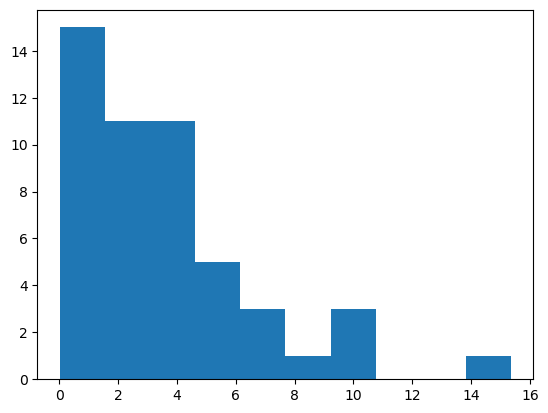

In [184]:
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt

np.random.seed(12345)

obs_data = expon.rvs(scale=3, size=50)
fig, ax = plt.subplots()
ax.hist(obs_data)

The likelihood function will be 
$$ L(\lambda) = \prod_{i=1}^{n} Prob(x_i) = \frac{1}{\lambda ^{n}} e^{-\frac{\sum_{i=1}^{n} x_i}{\lambda}}$$

Taking natural log on both sides will make our function to be

$$ l(\lambda) =  -n \times ln\lambda - \frac{\sum_{i=1}^{n} x_i}{\lambda}$$.

Now, we'll use scipy.optimize to find our mle

In [185]:
import scipy.optimize as opt

#define our log-likelihood function 
def expo_logL(param, data):
    N = len(data)
    x = param
    logL = -N * np.log(x) - np.sum(data) / x
    return -logL   #return -log likelihood because scipy.stats.optimize only have minimize function
                   #the duality concept in mathematics is talking about the minmax problem where one can convert a minimize problem into a maximize problem

#defining the MLE procedure 
def expon_mle(data):
    res = opt.minimize_scalar(
        expo_logL, 
        args=(data,))
    lambda_estimate =res.x
    return lambda_estimate

Now is the moment of truth where we'll try to use our MLE function and see if we get a similiar $\lambda$

In [186]:
expon_mle(obs_data)

C:\Users\farea\AppData\Local\Temp\ipykernel_5560\1538370410.py:8: RuntimeWarning: divide by zero encountered in log
  logL = -N * np.log(x) - np.sum(data) / x
C:\Users\farea\AppData\Local\Temp\ipykernel_5560\1538370410.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  logL = -N * np.log(x) - np.sum(data) / x
C:\Users\farea\AppData\Local\Temp\ipykernel_5560\1538370410.py:8: RuntimeWarning: invalid value encountered in double_scalars
  logL = -N * np.log(x) - np.sum(data) / x


3.426350696255527

The $\lambda$ seems a bit off by about 16% of the true value $\lambda = 3 $. What happen if we increase the number of our sample size? let's say to n=1000

In [188]:
np.random.seed(12345)

obs_data = expon.rvs(scale=3, size=1000)

In [189]:
expon_mle(obs_data)

C:\Users\farea\AppData\Local\Temp\ipykernel_5560\1538370410.py:8: RuntimeWarning: divide by zero encountered in log
  logL = -N * np.log(x) - np.sum(data) / x
C:\Users\farea\AppData\Local\Temp\ipykernel_5560\1538370410.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  logL = -N * np.log(x) - np.sum(data) / x
C:\Users\farea\AppData\Local\Temp\ipykernel_5560\1538370410.py:8: RuntimeWarning: invalid value encountered in double_scalars
  logL = -N * np.log(x) - np.sum(data) / x


3.012798395297585

It is getting better. 

However, as we'll moving on, we will see that the MLE technique is only useful if we know the underlying distribution that generate our sample. Usually, it is hard to determine which distribution our data is coming from because there are lots of distribution that originates from the same type of distribution family. Other techniques such as robust statistics or maximum-a-posteriori are more convenient to use since these technique have more flexibility when dealing with complex function.

To summarize, we have look on the basic idea of the MLE technique, which is to maximize the joint probability of our observed data. We also have went through the steps on how to change the likelihood function into the log-likelihood function and create our own procedure to find the solution of x (parameter) that will maximize our log-likelihood. Finally, we also have discussed the limitation of the MLE technique and what is the alternative that we can use to work around on this limitation that we're facing.

😊😊😊